In [269]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
plt.rcParams.update({'font.size': 44})

datasets = {
    "CAPOD": "/scratch/users/branisj/CAPOD_sampled_1024/color/**/*.ply",
    "s3dis": "/scratch/users/branisj/stanford_normal_1024/*.ply",
    "blensor_no_noise": "/scratch/users/branisj/blensor_no_noise_normal_1024/*.ply",
    "blensor": "/scratch/users/branisj/blensor_normal_1024/*.ply"
}

In [254]:
def get_count(f):
    found_count = False
    while not found_count:
        line = f.readline()
        if line.startswith(b"element vertex"):
            found_count = True
    count = int(line.decode("utf-8").split(" ")[2])
    return count

def collect_counts(g):
    counts = []
    for filename in sorted(glob.glob(g)):
        with open(filename, "rb") as f:
            name = os.path.basename(f.name)
            counts.append((get_count(f), name))
    return counts
        

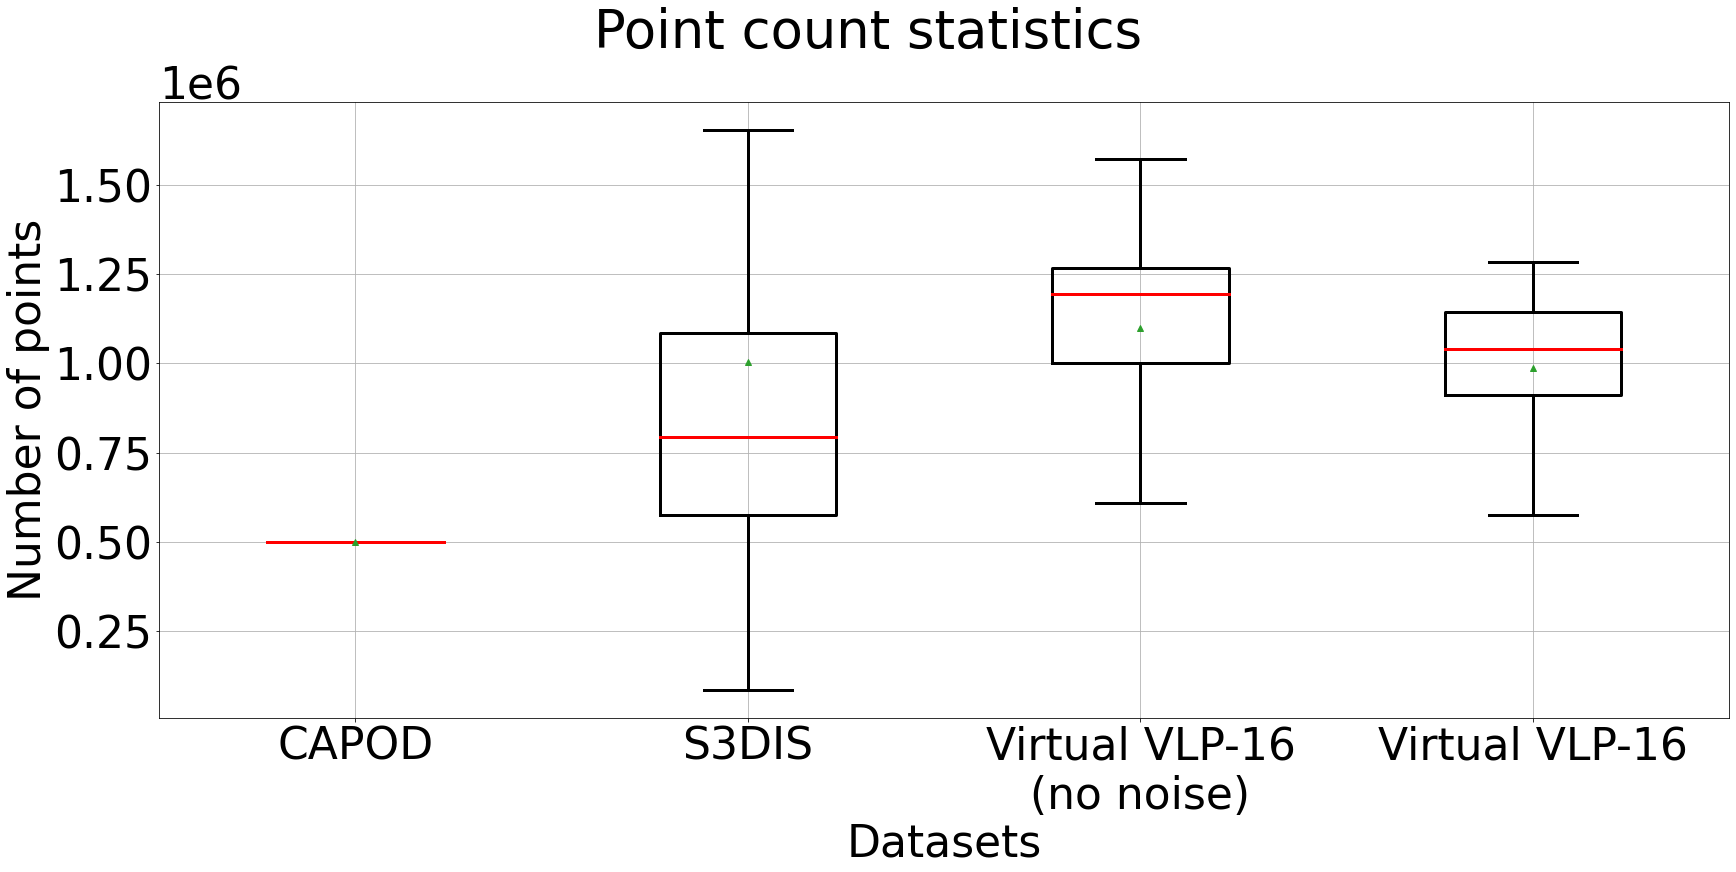

In [270]:

df = pd.DataFrame()
for dataset, g in datasets.items():
    counts = collect_counts(g)
    partial_df = pd.DataFrame([{"dataset": dataset, "Point counts": count, "Room": room } for count, room in counts])
    df = pd.concat([df, partial_df])
    
dataset2label = {
    "CAPOD": "CAPOD",
    "s3dis": "S3DIS",
    "blensor_no_noise": "Virtual VLP-16\n(no noise)",
    "blensor": "Virtual VLP-16"
}


fig, ax = plt.subplots(constrained_layout=True)
fig.set_figwidth(24)
fig.set_figheight(12)
count = 0
ax = df.groupby("dataset", sort=False).boxplot(
            subplots=False,
            medianprops=dict(linestyle='-', linewidth=3, color="red"),
            boxprops=dict(linestyle='-', linewidth=3),
            whiskerprops=dict(linestyle='-', linewidth=3),
            capprops=dict(linestyle='-', linewidth=3),
            showfliers=False,
            showmeans=True,
            grid=True)
ax.set_ylabel("Number of points")
ax.set_xlabel("Datasets")
ax.set_title("")
ax.set_xticks(range(1, 5), labels=dataset2label.values())
fig.suptitle("Point count statistics")
fig.savefig("plots/point_counts.png", bbox_inches='tight', pad_inches=1)